In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
data = pd.read_csv(r'../data/all_wells.csv')
data.fillna(data.mean(), inplace=True)
data.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,proppant weight (lbs),pump rate (cubic feet/min),name,cumulative production
0,66100.0,22300.0,0.09,0.033,0.332,9440769.483,0.124740,0.875260,260036.414279,275.737593,Tarragon 4-119H,81324.0
1,66199.0,22300.0,0.12,0.057,0.332,9429043.880,0.124979,0.875021,763209.659862,301.003964,Tarragon 4-119H,81324.0
2,66297.0,22300.0,0.11,0.050,0.332,9417413.010,0.125221,0.874779,429740.754787,324.145032,Tarragon 4-119H,81324.0
3,66396.0,22300.0,0.08,0.024,0.332,9405879.454,0.125469,0.874531,763209.659862,301.003964,Tarragon 4-119H,81324.0
4,66495.0,22300.0,0.08,0.031,0.332,9394445.773,0.125720,0.874280,485657.822229,320.868488,Tarragon 4-119H,81324.0


In [3]:
predictors = data[['easting', 'northing']]

In [4]:
def model_porosity():
    train_x, test_x, train_y, test_y = train_test_split(predictors, data['porosity'], test_size=0.8, random_state=0)
    model = GradientBoostingRegressor(random_state=0)
    model.fit(train_x, train_y)
    
    print('Porosity Score', model.score(test_x, test_y))
    
    return model

In [5]:
def model_permeability():
    train_x, test_x, train_y, test_y = train_test_split(predictors, data['permeability'], test_size=0.8, random_state=0)
    model = GradientBoostingRegressor(random_state=0)
    model.fit(train_x, train_y)
    
    print('Permeability Score', model.score(test_x, test_y))
    
    return model

In [6]:
def model_youngs():
    train_x, test_x, train_y, test_y = train_test_split(predictors, data['Young\'s Modulus'], test_size=0.8, random_state=0)
    model = GradientBoostingRegressor(random_state=0)
    model.fit(train_x, train_y)
    
    print('Young\'s Modulus Score', model.score(test_x, test_y))
    
    return model

In [7]:
def model_oil():
    train_x, test_x, train_y, test_y = train_test_split(predictors, data['oil saturation'], test_size=0.8, random_state=0)
    model = GradientBoostingRegressor(random_state=0)
    model.fit(train_x, train_y)
    
    print('Oil saturation Score', model.score(test_x, test_y))
    
    return model

In [8]:
def model_poissons():
    train_x, test_x, train_y, test_y = train_test_split(predictors, data['Poisson\'s ratio'], test_size=0.8, random_state=0)
    model = GradientBoostingRegressor(random_state=0)
    model.fit(train_x, train_y)
    
    print('Poisson\'s Ratio Score', model.score(test_x, test_y))
    
    return model

In [9]:
def model_cumulative_production():
    oip_features = data[['porosity', 'permeability', 'Poisson\'s ratio', 'Young\'s Modulus', 'oil saturation']]
    train_x, test_x, train_y, test_y = train_test_split(oip_features, data['cumulative production'], test_size=0.8, random_state=0)
    model = LinearRegression()
    model.fit(train_x, train_y)
    
    print('Cumulative Production Score', model.score(test_x, test_y))
    print('Coefficients', model.coef_)
    
    return model

In [10]:
def predict_and_plot(model, feature, precision=500):
    easting = predictors['easting']
    northing = predictors['northing']
    x = np.linspace(easting.min(), easting.max(), precision)
    y = np.linspace(northing.min(), northing.max(), precision)

    input_array = []

    print(x.shape, y.shape)
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            input_array.append((x[i], y[j]))

    predictions = model.predict(input_array)

    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.pcolormesh(predictions.reshape(precision, precision).T, vmin=data[feature].min(), vmax=data[feature].max())
    plt.colorbar()

In [11]:
porosity_model = model_porosity()
permeability_model = model_permeability()
poissons_model = model_poissons()
youngs_model = model_youngs()
oil_model = model_oil()
cumulative_production_model = model_cumulative_production()

Porosity Score 0.7058733860655523
Permeability Score 0.6552208536538979
Poisson's Ratio Score 0.9517418212716473
Young's Modulus Score 0.9571747697812902
Oil saturation Score 0.9721258958497359
Cumulative Production Score 0.37442351701798093
Coefficients [ 4.25152606e+05  4.87248347e+05  1.98444091e+05 -4.74014087e-06
  4.86905149e+04]


(500,) (500,)


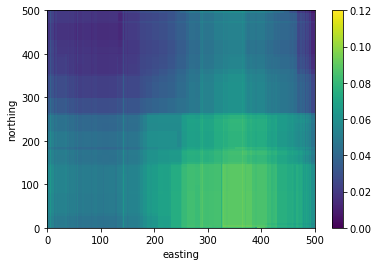

In [12]:
predict_and_plot(porosity_model, 'porosity')

In [ ]:
predict_and_plot(cumulative_production_model, 'cumulative production')

In [ ]:
predict_and_plot(oil_model, 'oil saturation')